# System Neural Diversity 
## An Ensemble

In [1]:
from utils.pack import Pack
from utils.agent import Agent
from utils.metrics import ThoughtDiversity
from utils.nets import Neuron
from collections import defaultdict
import networkx as nx
from utils.transducer import Transducer
import numpy as np

## Single Agent

In [2]:
# embedding_params = ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9]
# agent_hilbert = Agent('agent_hilbert_space',
#                       'documents/HilbertSpaceMulti.pdf', 1, embedding_params, False)
# agent_hilbert.chat_bot.one_question(
#     "Imagine how hilbert space could be used in a neural network for neuron representation?")

## Pack

In [3]:
learning_to_act = "chroma_db/agent_ltoa"
system_neural_diversity = "chroma_db/agent_snd"
foundational_models = "chroma_db/agent_foundation"
norbet_cog = "chroma_db/agent_norbert"
viz_quant = "chroma_db/agent_quant"
cot_path = "chroma_db/agent_cot"

embedding_params = [
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
]
# name, path, cot_type, new_bool
agent_specs = [
    ['agent_ltoa', learning_to_act, 0, True],
    ['agent_snd', system_neural_diversity, 0, True],
    ['agent_foundation', foundational_models, 0, True],
    ['agent_norbert', norbet_cog, 0, True],
    ['agent_cot', cot_path, 0, True]
]

test_pack = Pack(agent_specs, embedding_params)

🔥  Conjuring up agent_ltoa  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_ltoa ...
agent agent_ltoa loaded

🧚 creating chat_bot   🧚

the path  being used for agent_ltoa is chroma_db/agent_ltoa
🌈 
🔥  Conjuring up agent_snd  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_snd ...
agent agent_snd loaded

🧚 creating chat_bot   🧚

the path  being used for agent_snd is chroma_db/agent_snd
🌈 
🔥  Conjuring up agent_foundation  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_foundation ...
agent agent_foundation loaded

🧚 creating chat_bot   🧚

the path  being used for agent_foundation is chroma_db/agent_foundation
🌈 
🔥  Conjuring up agent_norbert  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_norbert ...
agent agent_norbert loaded

🧚 creating chat_bot   🧚

the path  being used for agent_norbert is chroma_db/agent_norbert
🌈 
🔥  Conjuring up agent_cot  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent_cot ...
agent agen

loading agent agent_ltoa ... 


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

loading agent agent_snd ... 


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

loading agent agent_foundation ... 


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

loading agent agent_norbert ... 


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

loading agent agent_cot ... 


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

response {'the', 'can', 'neural', 'neuron', 'neurons', 'learning.', 'about', 'They', 'improved', 'seem', 'when', 'focused', 'exploring', 'even', 'of', 'reinforcement', 'useful', 'with', 'to', 'and', "author's", 'optimizing', 'work', 'how', 'more', 'understanding', 'expressive', 'diverse', 'transformations', 'interest', 'author', 'networks.', 'networks', 'including', 'have', 'provided', 'deep', 'types', 'potential', 'The', 'result', 'various', 'representations,', 'strong', 'arbitrary', 'be', 'in', 'suggests', 'tasks,', 'made', 'random', 'capabilities', 'appears', 'a', 'curiosity', 'on', 'input.'}
response {'hierarchical', 'terms', 'the', 'ability', 'unseen', 'can', 'neural', 'represent', 'set', 'multilayer', 'broad', 'capabilities.', 'model', 'for', 'their', 'They', 'importance', 'new', 'one', 'seems', 'create', 'expressivity', 'of', 'from', 'supports', 'even', 'also', 'functions.', 'natural', 'especially', 'to', 'view', 'and', "author's", 'enhancing', 'that', 'theorem,', 'examples.', '

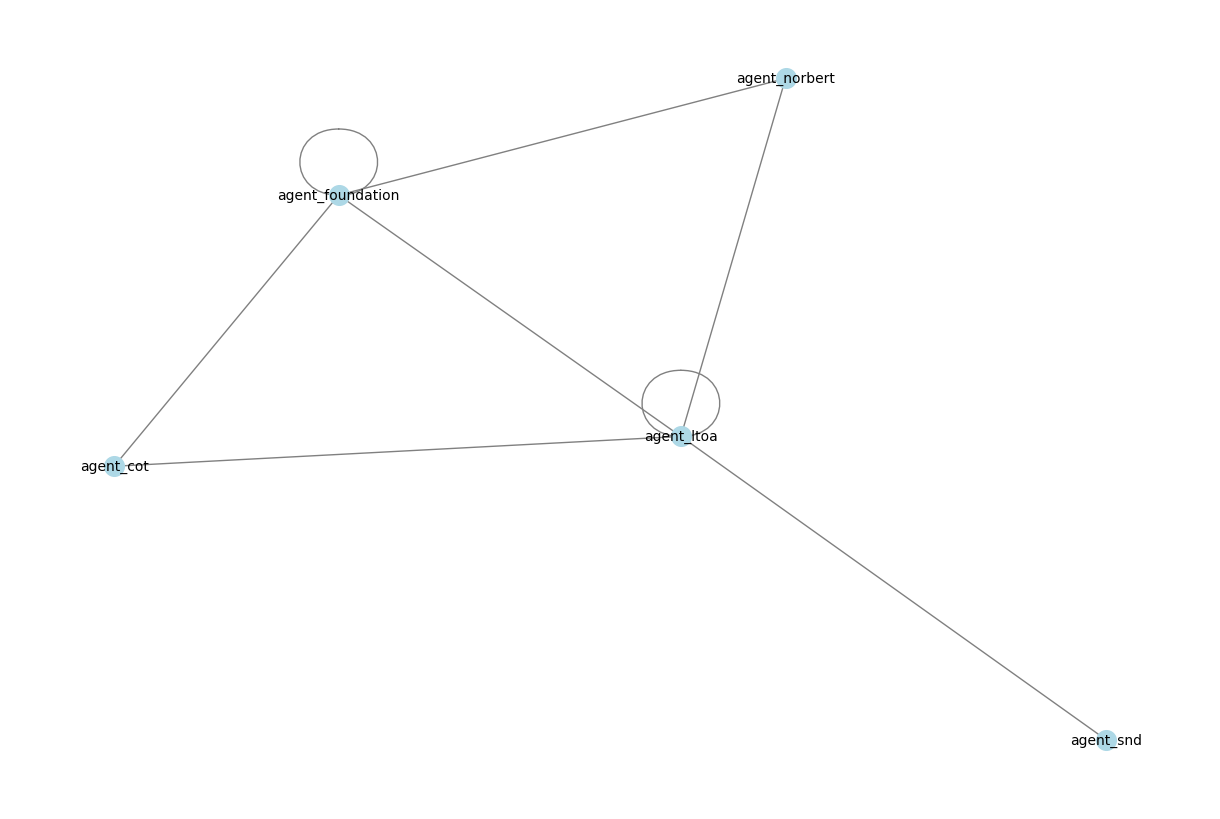

{'agent_ltoa': 0.62384078329731, 'agent_snd': 0.1862123454773028, 'agent_foundation': 0.5682566456970096, 'agent_norbert': 0.35583143769769954, 'agent_cot': 0.35583143769769954}


In [4]:
input_layer = Transducer(agents=test_pack.agents,
                         question="Imagine what the author would think about neural networks?")

test_pack.update_edges()
test_pack.graph()

In [5]:
input_layer.jaccard_indices

defaultdict(None,
            {'agent_ltoa': 0.3027027027027027,
             'agent_snd': 0.372972972972973,
             'agent_foundation': 0.32432432432432434,
             'agent_norbert': 0.25268817204301075,
             'agent_cot': 0.08108108108108109})

In [6]:
main_vector = input_layer.prob_vect(input_layer.all_responses)

In [7]:
ltoa = np.array(input_layer.prob_vectors['agent_ltoa'])
foundation = np.array(input_layer.prob_vectors['agent_foundation'])

print(np.dot(ltoa, main_vector))

0.005788854003139718


In [8]:
input_layer.create_layer()
input_layer.neurons

defaultdict(None,
            {'agent_ltoa': <utils.nets.Neuron at 0x7fb142043280>,
             'agent_snd': <utils.nets.Neuron at 0x7fb142042f20>,
             'agent_foundation': <utils.nets.Neuron at 0x7fb30821f5b0>,
             'agent_norbert': <utils.nets.Neuron at 0x7fb30821e8f0>,
             'agent_cot': <utils.nets.Neuron at 0x7fb30821e950>})

In [9]:
foundation = input_layer.neurons['agent_foundation']
foundation.dot_product

0.0034045014724717274

In [11]:
print(f'x: {foundation.x}, y: {foundation.y}, z" {foundation.z}')

x: 0.32432432432432434, y: 0.0034045014724717274, z" 0.19178606735463913


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

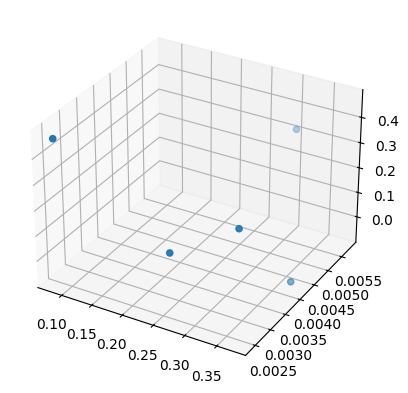

In [22]:
points = []

for name, agent in input_layer.neurons.items():
    points.append([agent.x, agent.y, agent.z])

# Unpacking the x, y, z coordinates
x = [item[0] for item in points]
y = [item[1] for item in points]
z = [item[2] for item in points]

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the dots
ax.scatter(x, y, z)
plt.show()